#Отток клиентов телекоммуникационных компаний




##Цели проекта
*   Создать предиктивную модель для классификации клиентов на «риск ухода» и «вероятное удержание» с высокой точностью.

*   Обеспечить показатель Recall не менее 0.80 для минимизации пропущенных уходящих клиентов.

*   Повысить эффективность маркетинговых и сервисных кампаний за счет точечного воздействия на клиентов с высоким риском churn.

# О наборе данных
Обзор набора данных

Этот набор данных содержит подробную информацию о клиентах телекоммуникационных услуг в США, включая их демографические данные, тарифные планы и информацию об оттоке. Эти данные были собраны для выявления ключевых факторов, способствующих оттоку клиентов, который происходит, когда клиенты отказываются от услуг.
##Ключевые атрибуты

Демографические данные клиента: пол, город, штат, почтовый индекс и географические координаты (широта и долгота).
Информация о подписке: сюда входят сведения о типе контракта клиента (ежемесячный, годовой, двухгодичный), способе оплаты (электронный чек, чек по почте, кредитная карта и т. д.) и ежемесячных платежах.
Данные об оттоке: показывают, произошел ли отток клиента (Да/Нет), а также оценку, прогнозирующую вероятность оттока, причины ухода и пожизненную ценность клиента (CLTV).
Причины оттока: Указываются конкретные причины оттока, например, предложения конкурентов, недовольство обслуживанием или переезд в новое место.
##Ключевые столбцы
*   CustomerID: уникальный идентификатор для каждого клиента.

*   gender : Пол клиента.

*   Contract: Тип контракта (ежемесячный, годовой и т. д.).

*   Payment Method: каким образом клиент осуществляет платежи (например, банковский перевод, кредитная карта).

*   Monthly Charges:  сумма, которую клиент получает ежемесячно.

*   Total Charges:  совокупная сумма, выставленная клиенту.

*   Churn Label: указывает, произошел ли отток клиента (Да/Нет).

*   Churn Reason: причина ухода клиента
##Основные моменты набора данных

33 функции, отражающие различные аспекты демографических данных клиентов, платежного поведения и данных об оттоке.

Подробные данные об оттоке клиентов с указанием его причин, которые могут помочь в разработке стратегий удержания клиентов.
Геопространственная информация, включая местоположение клиентов (широта, долгота), которая может быть полезна для регионального анализа оттока.

*   ссылка Kaggle https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn
*   ссылка Google диск https://drive.google.com/file/d/1j1Bq76b8pRd7fmJN1eVS3Z8Wqg9MDEFY/view?usp=sharing

#Запуск Кетбуста

Почему CatBoost? Потому что CatBoost хорошо справляется с категориальными признаками и учет дисбаланса классов CatBoost имеет удобный и интуитивно понятный интерфейс, быстро обучается и позволяет гибко настраивать параметры, что значительно ускоряет процесс построения и оптимизации модели

In [ ]:
! pip install catboost

#Импорт библиотеки

In [227]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier,cv, Pool
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve,roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings("ignore")

#Загрузка данных

In [129]:
!gdown '1j1Bq76b8pRd7fmJN1eVS3Z8Wqg9MDEFY'
!unzip '/content/archive (4).zip'

Downloading...
From: https://drive.google.com/uc?id=1j1Bq76b8pRd7fmJN1eVS3Z8Wqg9MDEFY
To: /content/archive (4).zip
100% 1.31M/1.31M [00:00<00:00, 54.4MB/s]
Archive:  /content/archive (4).zip
replace Telco_customer_churn.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [199]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')

##Разведочный анализ данных

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [201]:
df.isna().sum() / len(df) * 100 # Посчитаем процент пропусков в каждом столбце

,0
CustomerID,0.000000
Count,0.000000
Country,0.000000
State,0.000000
City,0.000000
Zip Code,0.000000
Lat Long,0.000000
Latitude,0.000000
Longitude,0.000000
Gender,0.000000


In [202]:
df.groupby('Churn Label')['Churn Reason'].count()

,Churn Reason
Churn Label,
No,0
Yes,1869


Тут мы видим признак Churn Reason, который отсутствует в 73,46 % случаев  все комментарии оставлены только клиентами, которые ушли в отток. Это очень плохо влияет на обучение, поэтому я решил их удалить.

In [203]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [204]:
df['Churn Label'].value_counts()/len(df)*100 # Распределение таргета в виде процентов

,count
Churn Label,
No,73.463013
Yes,26.536987


Дисбаланс распределения

In [205]:
df.select_dtypes(include=['object', 'category']).columns # категориальные признаки

Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Label', 'Churn Reason'],
      dtype='object')

In [206]:
df[['Lat Long', 'Total Charges', 'Latitude', 'Longitude']]

,Lat Long,Total Charges,Latitude,Longitude
0,"33.964131, -118.272783",108.15,33.964131,-118.272783
1,"34.059281, -118.30742",151.65,34.059281,-118.307420
2,"34.048013, -118.293953",820.5,34.048013,-118.293953
3,"34.062125, -118.315709",3046.05,34.062125,-118.315709
4,"34.039224, -118.266293",5036.3,34.039224,-118.266293
...,...,...,...,...
7038,"34.341737, -116.539416",1419.4,34.341737,-116.539416
7039,"34.667815, -117.536183",1990.5,34.667815,-117.536183
7040,"34.559882, -115.637164",7362.9,34.559882,-115.637164
7041,"34.1678, -116.86433",346.45,34.167800,-116.864330


In [207]:
df[['Churn Label', 'Churn Value',
       'Churn Score']]

,Churn Label,Churn Value,Churn Score
0,Yes,1,86
1,Yes,1,67
2,Yes,1,86
3,Yes,1,84
4,Yes,1,89
...,...,...,...
7038,No,0,45
7039,No,0,59
7040,No,0,71
7041,No,0,59


Признаки, которые повторяют таргет, лучше убрать.

In [208]:
df[['Country','State' ]].value_counts()

,,count
Country,State,
United States,California,7043


Здесь абсолютно бесполезные признаки, которые содержат одинаковые значения в каждой строке

In [209]:
df['Churn Label'] = df['Churn Label'].map({'No': 0, 'Yes': 1}) # Заменяем текстовые значения в столбце 'Churn Label' на числовые
df['Churn Label'].value_counts()

,count
Churn Label,
0,5174
1,1869


In [210]:
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True) #Заменяем пустые строки или строки, содержащие только пробелы

In [211]:
df['Total Charges'] = df['Total Charges'].astype(float) # Преобразуем столбец 'Total Charges' к типу float
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean()) # Заполняем пропущенные значения (NaN) в 'Total Charges' средним значением этого столбца

#Визуализации

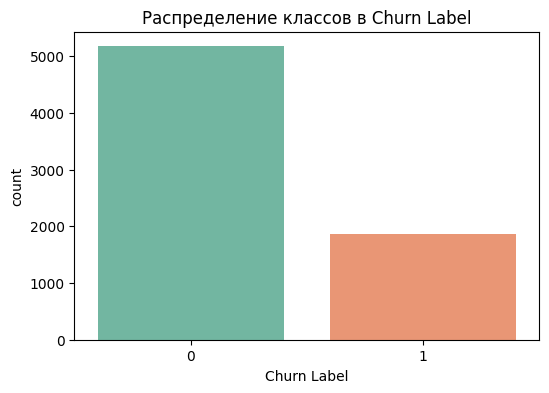

In [212]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', data=df, palette="Set2")
plt.title("Распределение классов в Churn Label")
plt.show()

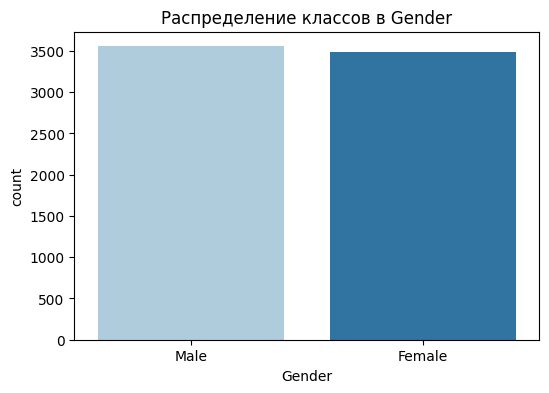

In [214]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette=['#A6CEE3', '#1F78B4'])
plt.title("Распределение классов в Gender")
plt.show()

карта Калифорнии
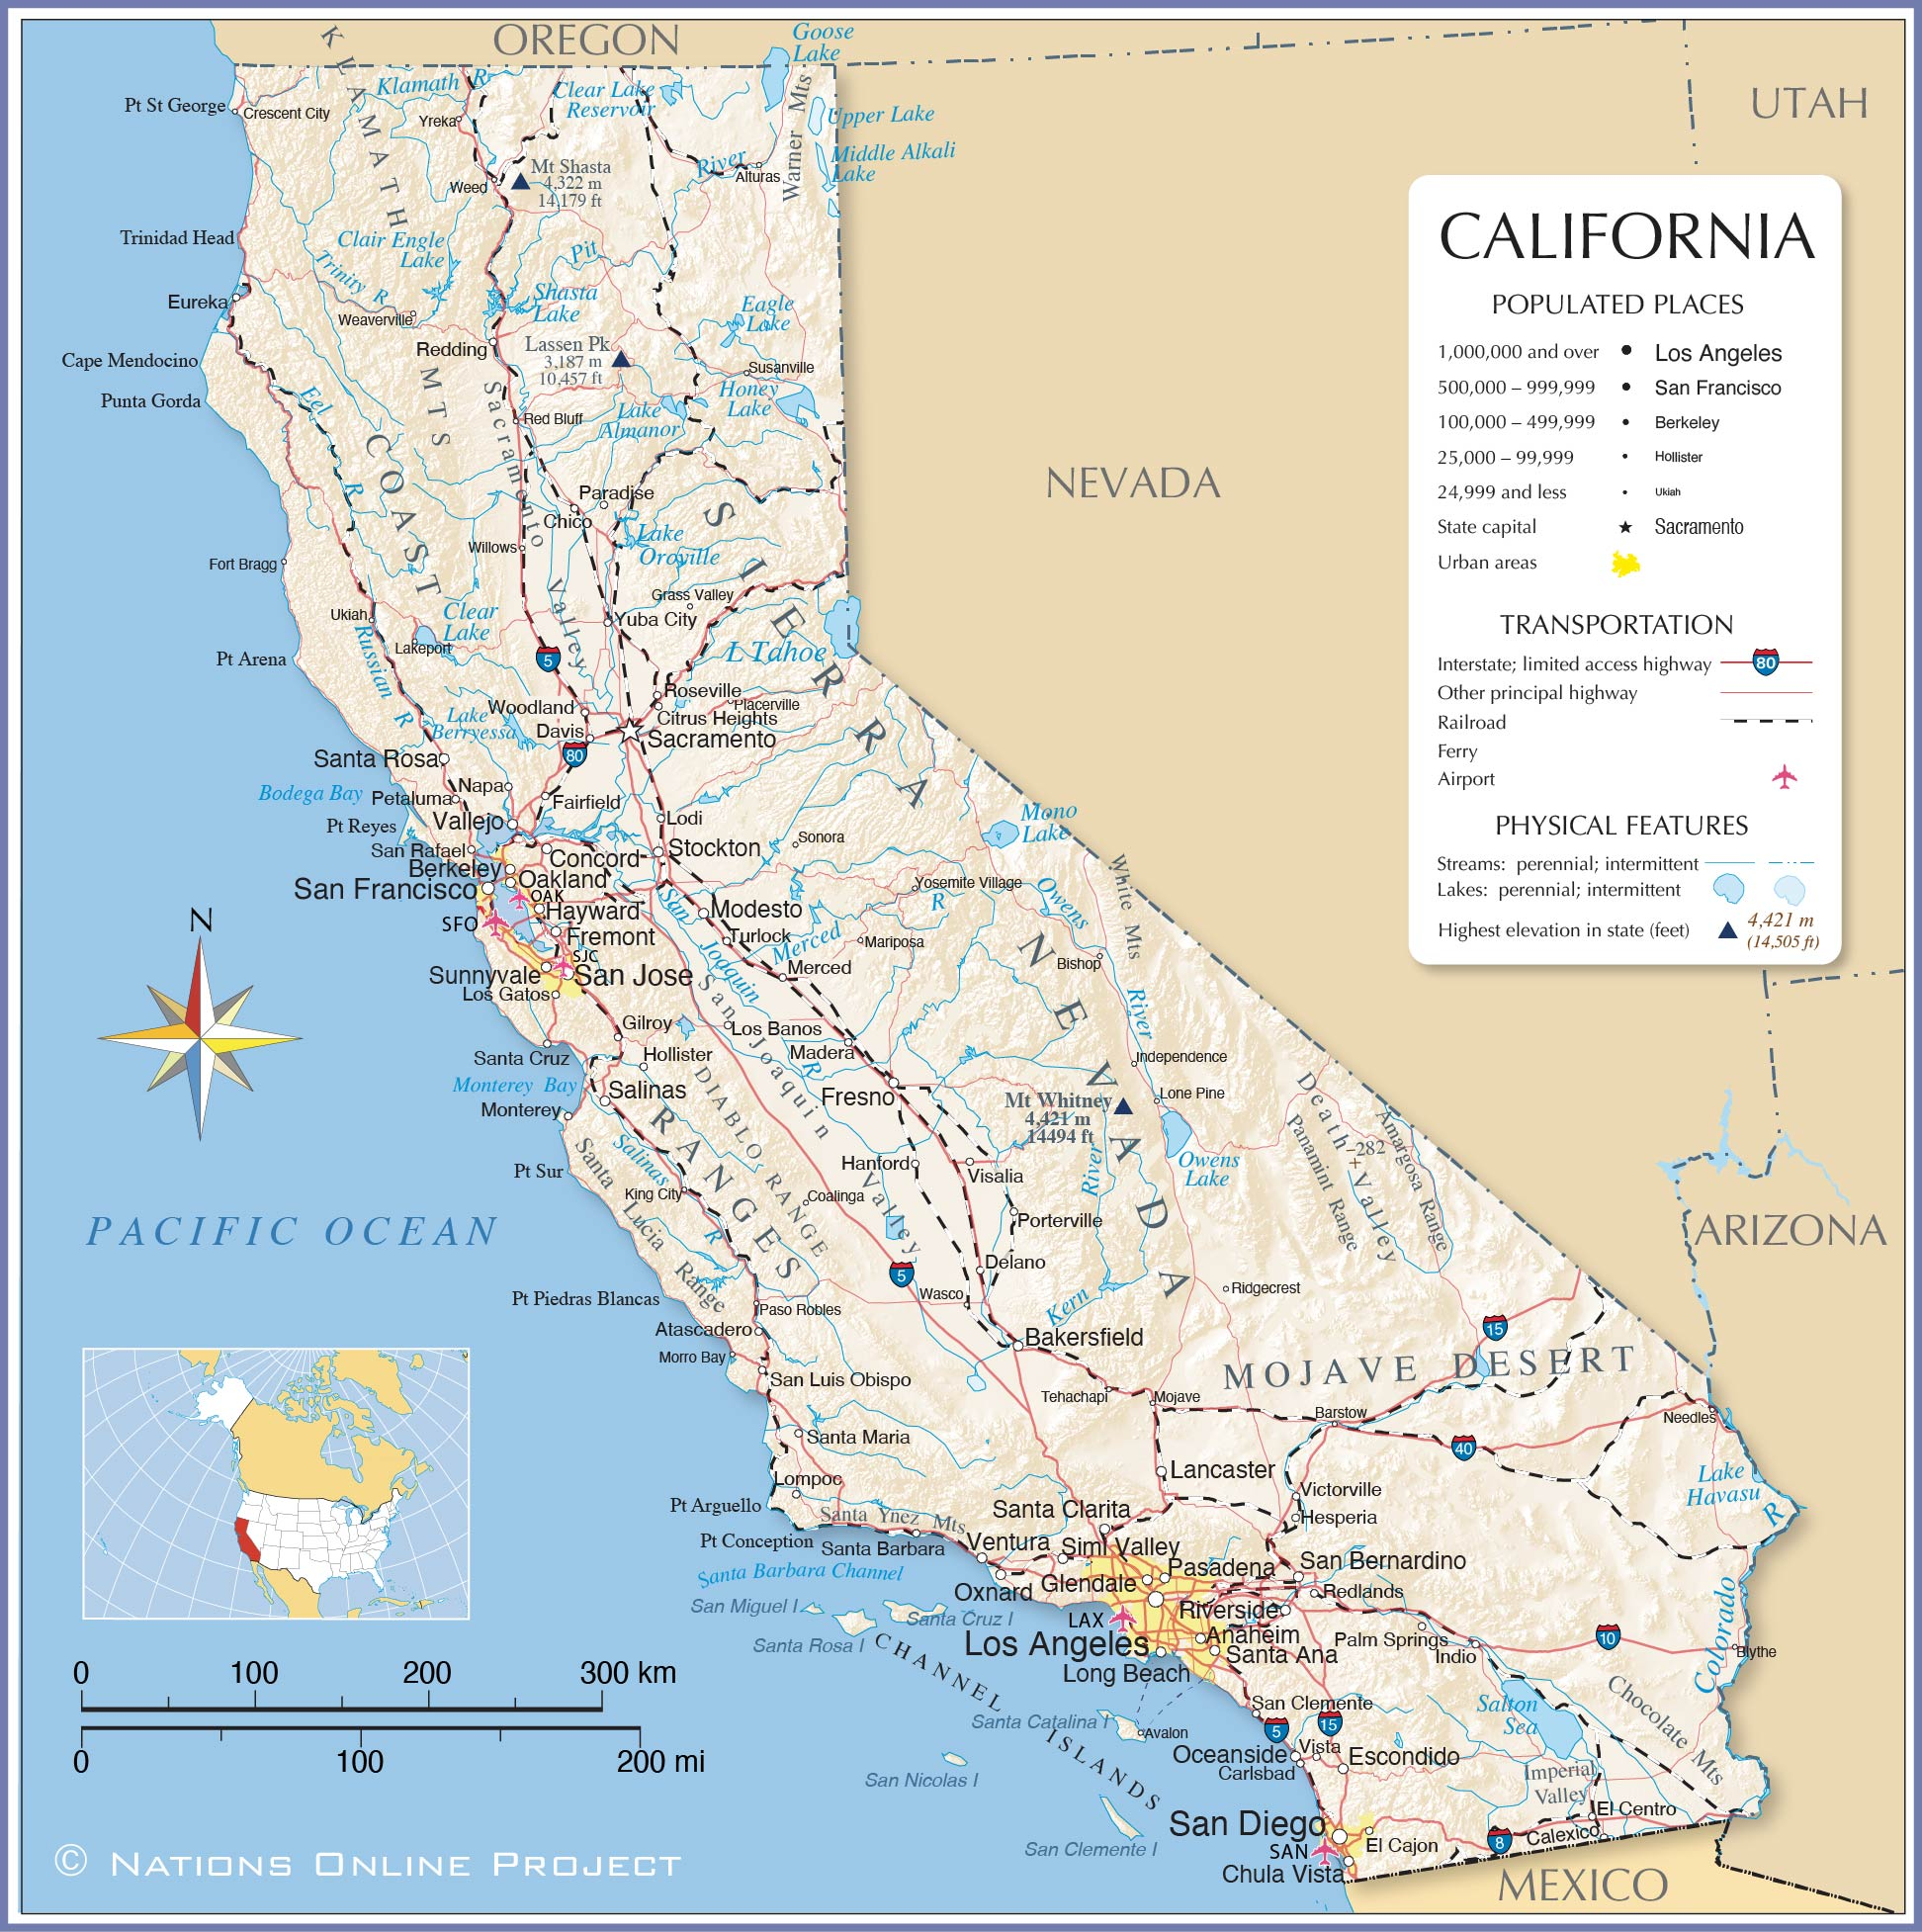

In [215]:
def color_producer(label):
    return 'green' if label == 0 else 'red'

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color_producer(row['Churn Label']),
        fill=True,
        fill_opacity=0.7
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

Здесь визуализировано, как выглядят адреса точек на карте: зелёные точки — активные клиенты, красные — оттоки

#Разделим данные на train, val и test.

In [216]:
train, test = train_test_split(df, test_size=0.4, random_state=42, stratify=df['Churn Label'])
val, test = train_test_split(test, test_size=0.5, random_state=42, stratify=test['Churn Label'])

#Запуск Кетбуста

Почему CatBoost? Потому что CatBoost хорошо справляется с категориальными признаками и учет дисбаланса классов CatBoost имеет удобный и интуитивно понятный интерфейс, быстро обучается и позволяет гибко настраивать параметры, что значительно ускоряет процесс построения и оптимизации модели

In [112]:
! pip install catboost

In [217]:
from catboost import CatBoostClassifier,cv, Pool

#метки признаков

In [218]:
X = ['City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
       'Dependents', 'Tenure Months',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges','CLTV']
y = ['Churn Label']

cat_features = ['City', 'Lat Long',
       'Dependents', 'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

#Pool

In [219]:
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X].fillna('NaN'),
                  label=val[y],
                  cat_features=cat_features
                 )
test_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

параметры

In [220]:
params = {'iterations':1000,
          'verbose':100,
          'random_seed': 42,
          'class_weights':[1, 3],
          'learning_rate':0.008}

#Обучаем модель

In [221]:
model = CatBoostClassifier(**params)

In [222]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6897013	test: 0.6896649	best: 0.6896649 (0)	total: 30ms	remaining: 29.9s
100:	learn: 0.5148966	test: 0.5167550	best: 0.5167550 (100)	total: 2.02s	remaining: 18s
200:	learn: 0.4711534	test: 0.4763203	best: 0.4763203 (200)	total: 4.01s	remaining: 15.9s
300:	learn: 0.4519015	test: 0.4617628	best: 0.4617628 (300)	total: 7.43s	remaining: 17.3s
400:	learn: 0.4391793	test: 0.4550861	best: 0.4550861 (400)	total: 9.52s	remaining: 14.2s
500:	learn: 0.4307564	test: 0.4517640	best: 0.4517640 (500)	total: 11.6s	remaining: 11.6s
600:	learn: 0.4249833	test: 0.4501756	best: 0.4501756 (600)	total: 13.5s	remaining: 8.95s
700:	learn: 0.4191513	test: 0.4486823	best: 0.4486823 (700)	total: 15.5s	remaining: 6.6s
800:	learn: 0.4141200	test: 0.4477212	best: 0.4476978 (798)	total: 17.8s	remaining: 4.41s
900:	learn: 0.4087362	test: 0.4472569	best: 0.4472554 (897)	total: 21.3s	remaining: 2.34s
999:	learn: 0.4029749	test: 0.4468651	best: 0.4466212 (974)	total: 23.4s	remaining: 0us

bestTest = 0.446621

In [223]:
y_pred = model.predict(test[X])
y_proba = model.predict_proba(test[X])[:,1]

print("Accuracy:", accuracy_score(test[y], y_pred))
print("Precision:", precision_score(test[y], y_pred))
print("Recall:", recall_score(test[y], y_pred))
print("F1 Score:", f1_score(test[y], y_pred))
print("ROC AUC:", roc_auc_score(test[y], y_proba))


Accuracy: 0.7494677075940384
Precision: 0.5180102915951973
Recall: 0.8074866310160428
F1 Score: 0.6311389759665622
ROC AUC: 0.8503190472499934


In [224]:
precisions, recalls, thresholds = precision_recall_curve(test[y], y_proba)
for p, r, t in zip(precisions, recalls, thresholds):
    print(f"Threshold={t:.2f}, Precision={p:.3f}, Recall={r:.3f}")


Threshold=0.00, Precision=0.265, Recall=1.000
Threshold=0.00, Precision=0.266, Recall=1.000
Threshold=0.00, Precision=0.266, Recall=1.000
Threshold=0.00, Precision=0.266, Recall=1.000
Threshold=0.00, Precision=0.266, Recall=1.000
Threshold=0.00, Precision=0.266, Recall=1.000
Threshold=0.00, Precision=0.267, Recall=1.000
Threshold=0.00, Precision=0.267, Recall=1.000
Threshold=0.00, Precision=0.267, Recall=1.000
Threshold=0.00, Precision=0.267, Recall=1.000
Threshold=0.00, Precision=0.267, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.268, Recall=1.000
Threshold=0.00, Precision=0.269, Recall=1.000
Threshold=0.00, Precision=0.269, Recall=1.000
Threshold=0.00, Precision=0.269, Recall=1.000
Threshold=0.00, Precision=0.269, Recall=1.000
Threshold=0.00, Precision=0.269, R

десь представлена таблица для выбора порогов. Выбор зависит от задачи

## Roc кривая

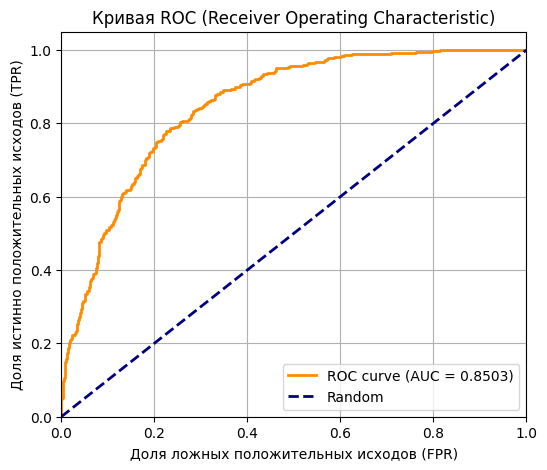

In [225]:
# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(test[y], y_proba)

# Вычисляем AUC
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных положительных исходов (FPR)')
plt.ylabel('Доля истинно положительных исходов (TPR)')
plt.title('Кривая ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [226]:
model.get_feature_importance(prettified=True) #важность признаки

,Feature Id,Importances
0,Dependents,28.855904
1,Contract,19.998002
2,Tenure Months,7.354502
3,Internet Service,6.916947
4,Online Security,3.548682
5,Payment Method,3.536290
6,Total Charges,3.348569
7,Tech Support,3.118976
8,Online Backup,3.013738
9,Streaming Movies,2.343039


#Заключение
Модель CatBoost для предсказания оттока клиентов показала хорошие результаты: Recall — 80,7%, Accuracy — 74,9%, F1 — 63,1%, ROC AUC — 85%. Высокий Recall гарантирует своевременное выявление уходящих клиентов, что позволит эффективно снизить уровень оттока и увеличить доходы компании.